<a href="https://colab.research.google.com/github/BenFarz/Demo/blob/main/train6h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import numpy as np

In [31]:
tf.__version__

'2.8.2'

In [32]:
X=tf.range(-100,100,4)

In [33]:
y=X+13
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-87, -83, -79, -75, -71, -67, -63, -59, -55, -51, -47, -43, -39,
        -35, -31, -27, -23, -19, -15, -11,  -7,  -3,   1,   5,   9,  13,
         17,  21,  25,  29,  33,  37,  41,  45,  49,  53,  57,  61,  65,
         69,  73,  77,  81,  85,  89,  93,  97, 101, 105, 109], dtype=int32)>)

In [34]:
X=tf.cast(X, dtype=tf.float16)
y=tf.cast(y, dtype=tf.float16)
X,y

(<tf.Tensor: shape=(50,), dtype=float16, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.], dtype=float16)>,
 <tf.Tensor: shape=(50,), dtype=float16, numpy=
 array([-87., -83., -79., -75., -71., -67., -63., -59., -55., -51., -47.,
        -43., -39., -35., -31., -27., -23., -19., -15., -11.,  -7.,  -3.,
          1.,   5.,   9.,  13.,  17.,  21.,  25.,  29.,  33.,  37.,  41.,
         45.,  49.,  53.,  57.,  61.,  65.,  69.,  73.,  77.,  81.,  85.,
         89.,  93.,  97., 101., 105., 109.], dtype=float16)>)

In [35]:
X=tf.expand_dims(X, axis=-1)
y=tf.expand_dims(y, axis = -1)

In [36]:
X.dtype, y.dtype

(tf.float16, tf.float16)

In [37]:
X_train = X[:40]
y_train = y[:40]
X_test =X[40:]
y_test = y[40:]


In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [40]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
           optimizer= tf.keras.optimizers.SGD(),
           metrics=["mae"])
model.fit(X_train,y_train,epochs=100,verbose=0 )

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [42]:
y_pred=model.predict(X_test)

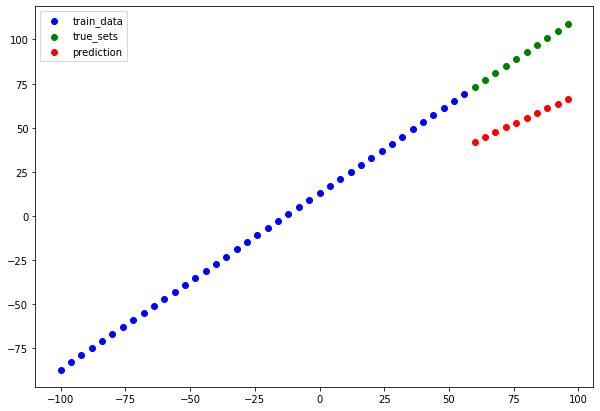

In [48]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train ,c="b", label="train_data")
plt.scatter(X_test, y_test, c="g", label="true_sets")
plt.scatter(X_test, y_pred, c="r", label="prediction")
plt.legend()

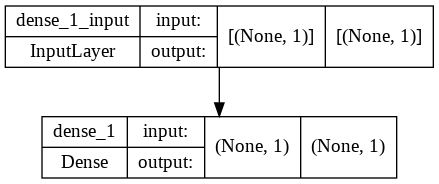

In [53]:
from tensorflow.keras.utils import plot_model as pm
pm(model=model, show_shapes=True)